In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image

In [2]:
# General params
#
# Note, if the 400x400 image is to slow, please use the 200x200
# image, just change 400.png for 200.png
img = image.imread('images/200.png')

# We are just interested on the RGB channels, not Alpha
img = img[:, :, 0:3]

# Image data
height, width, channels = img.shape

# Each pixel will be a datapoint
data_points = width*height

# Reshape image to be of shape (width*height, channels)
linear_img = img.copy().reshape(width*height, channels)

print(f"The image is {img.shape[0]} high {img.shape[1]} wide")

The image is 200 high 200 wide


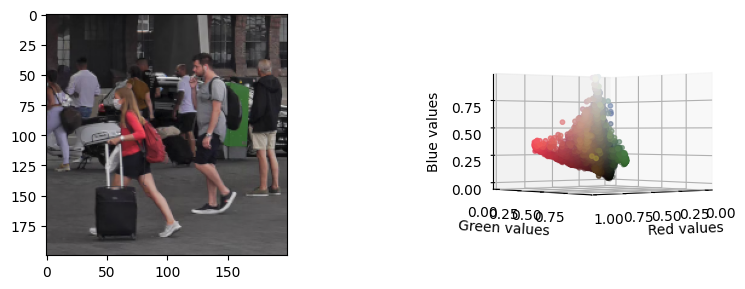

In [3]:
# Let's plot them first
fig = plt.figure(figsize=(10,3))
fig.add_subplot(1, 2, 1)
plt.imshow(img)

ax = fig.add_subplot(1, 2, 2, projection='3d')

# We will plot each color as its original value
#
# Please note that if your image is not normalized (the values of your pixels)
# are not in the [0-1] range, you need to normalize it if, for example, you
# got a [0-255] image, use the following line
# colors = (img_to_plot/255).reshape(img_to_plot_datapoints, 3)
colors = (img).reshape(data_points, 3)

# Separate the channels to use as coordinates
r = img[:, :, 0].reshape(data_points, 1)
g = img[:, :, 1].reshape(data_points, 1)
b = img[:, :, 2].reshape(data_points, 1)

# Plot
ax.scatter(r, g, b, s=10, facecolor=colors)

# Set an elevation and azimuth that shows the points well
ax.view_init(elev=0, azim=50)

ax.set_xlabel('Red values')
ax.set_ylabel('Green values')
ax.set_zlabel('Blue values')
              
# This adjusts the borders so that the labels do not cut off
plt.tight_layout()

In [7]:
def k_means(centroids, dataset, max_iterations=10):
    
    # Structure to keep track of which point is in which cluster  
    clusters = [[] for x in range(len(centroids))]
    indexes = [[] for x in range(len(centroids))]
    
    previous_centroids = None

    # Main loop
    for i in range(max_iterations):
        
        # Assign each point to its nearest centroid
        for point_index, point in enumerate(dataset):
            
            dist = float('inf')
            candidate_centroid = 0 # Index of the candidate cluster
            
            for centroid_index, centroid in enumerate(centroids):
                
                # Get the distance between the point and the centroid
                d = np.linalg.norm(point-centroid)
                
                # If we are closer to this centroid
                # assign this point to this centroid
                if d < dist:
                    dist = d
                    candidate_centroid = centroid_index
            
            # Now we know that index_point belongs to index_cluster
            clusters[candidate_centroid].append(point)
            indexes[candidate_centroid].append(point_index)
            
        # Now we recalculate the centroids, by doing the mean per cluster
        centroids = ([np.mean(np.array(clusters[x]), axis=0) 
                      for x in range(len(centroids))])
        
        # If the centroids have not changed, we have reached the limit
        # We need to use this generator since we are dealing with an array of numpy arrays
        if (previous_centroids != None 
            and not all([np.array_equal(x, y) 
                         for x, y in zip(previous_centroids, centroids)])):
            print("Breaking")
            break
            
        # Update the previous centroids
        previous_centroids = centroids
        
    return (centroids, indexes)

In [8]:
%%time
# How many clusters
K = 2

# Set seed so we can reproduce the results
np.random.seed(424242)

## Pick K random centroids
# Get K indexes
indexes = np.random.randint(0, data_points-1, K)

# Get the values of those indexes, each centroid will have
# channel coordinates
centroids = linear_img[indexes]

centroids, indexes = k_means(centroids, linear_img)

Breaking
CPU times: user 552 ms, sys: 54 ms, total: 606 ms
Wall time: 552 ms


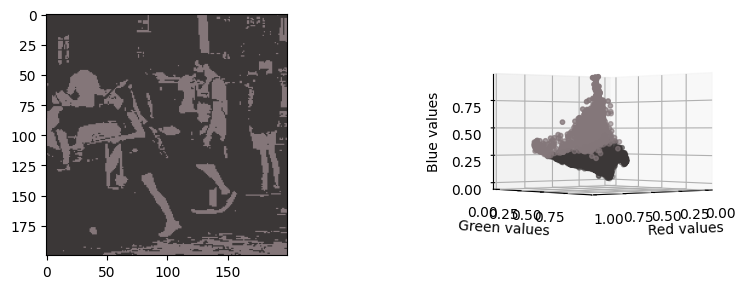

In [6]:
# Create a copy
img_to_plot = linear_img.copy()

# We will set all the points of the cluster to the color of its centroid
for cluster_index in range(K):
    for ind in indexes[cluster_index]:
        img_to_plot[ind] = centroids[cluster_index]

# Let's plot them first
fig = plt.figure(figsize=(10,3))
fig.add_subplot(1, 2, 1)
plt.imshow(img_to_plot.reshape(width, height, channels))

ax = fig.add_subplot(1, 2, 2, projection='3d')

colors = (img_to_plot).reshape(data_points, 3)

# Separate the channels to use as coordinates
r = img[:, :, 0].reshape(data_points, 1)
g = img[:, :, 1].reshape(data_points, 1)
b = img[:, :, 2].reshape(data_points, 1)

# Plot
ax.scatter(r, g, b, s=10, facecolor=colors)

# Set an elevation and azimuth that shows the points well
ax.view_init(elev=0, azim=50)

ax.set_xlabel('Red values')
ax.set_ylabel('Green values')
ax.set_zlabel('Blue values')
              
# This adjusts the borders so that the labels do not cut off
plt.tight_layout()